In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv ("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
# Check null Values in dataset
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
import warnings
warnings.filterwarnings("ignore")
dataset["salary"].fillna(0, inplace=True) # who have null Value they don't have work or not yet place.

In [6]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
print("How many of them are not Placed? \n", dataset["status"].value_counts()["Not Placed"])

How many of them are not Placed? 
 67


In [8]:
df_notplaced = dataset[dataset["status"]=="Not Placed"]
df_notplaced # reason for non-placement from the dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
dataset.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [11]:
def QuanQual_np(dataset):
    quan_np = []
    qual_np = []
    for columnName in dataset.columns:
        #print(columnName)
        if (dataset[columnName].dtype=='O'):
            #print ("Qual")
            qual_np.append (columnName)
        else:
            #print("quan")
            quan_np.append (columnName)
    return quan_np,qual_np  

In [12]:
QuanQual_np(dataset)

(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'],
 ['gender',
  'ssc_b',
  'hsc_b',
  'hsc_s',
  'degree_t',
  'workex',
  'specialisation',
  'status'])

In [13]:
quan_np,qual_np = QuanQual_np(dataset)

In [14]:
quan_np

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [15]:
qual_np

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [16]:
descriptive=pd.DataFrame(index=["Median"],columns=quan_np)
for columnName in quan_np:
    descriptive[columnName]["Median"]=df_notplaced[columnName].median()

In [17]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Median,107.0,56.28,60.33,61.0,67.0,60.69,0.0


In [18]:
df_placed = dataset[dataset["status"]=="Placed"]
df_placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [19]:
def QuanQual_pl(dataset):
    quan_pl = []
    qual_pl = []
    for columnName in dataset.columns:
        #print(columnName)
        if (dataset[columnName].dtype=='O'):
            #print ("Qual")
            qual_pl.append (columnName)
        else:
            #print("quan")
            quan_pl.append (columnName)
    return quan_pl,qual_pl

In [20]:
QuanQual_pl(dataset)

(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'],
 ['gender',
  'ssc_b',
  'hsc_b',
  'hsc_s',
  'degree_t',
  'workex',
  'specialisation',
  'status'])

In [21]:
quan_pl,qual_pl = QuanQual_pl(dataset)

In [22]:
quan_pl

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [23]:
qual_pl

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [24]:
descriptive1=pd.DataFrame(index=["Median"],columns=quan_pl)
for columnName in quan_pl:
    descriptive1[columnName]["Median"]=df_placed[columnName].median()

In [25]:
print("Not Placed Median: \n",descriptive)
print ("Placed Median: \n",descriptive1)

Not Placed Median: 
         sl_no  ssc_p  hsc_p degree_p etest_p  mba_p salary
Median  107.0  56.28  60.33     61.0    67.0  60.69    0.0
Placed Median: 
         sl_no ssc_p hsc_p degree_p etest_p   mba_p    salary
Median  108.5  72.5  68.0     68.0    72.0  62.245  265000.0


In [26]:
notplaced=pd.DataFrame(descriptive)
placed = pd.DataFrame(descriptive1)

In [35]:
from tabulate import tabulate
print ("\nNOT PLACED")
print(tabulate(notplaced, headers = 'keys', tablefmt = 'psql'))
print ("\nPLACED")
print(tabulate(placed, headers = 'keys', tablefmt = 'psql'))


NOT PLACED
+--------+---------+---------+---------+------------+-----------+---------+----------+
|        |   sl_no |   ssc_p |   hsc_p |   degree_p |   etest_p |   mba_p |   salary |
|--------+---------+---------+---------+------------+-----------+---------+----------|
| Median |     107 |   56.28 |   60.33 |         61 |        67 |   60.69 |        0 |
+--------+---------+---------+---------+------------+-----------+---------+----------+

PLACED
+--------+---------+---------+---------+------------+-----------+---------+----------+
|        |   sl_no |   ssc_p |   hsc_p |   degree_p |   etest_p |   mba_p |   salary |
|--------+---------+---------+---------+------------+-----------+---------+----------|
| Median |   108.5 |    72.5 |      68 |         68 |        72 |  62.245 |   265000 |
+--------+---------+---------+---------+------------+-----------+---------+----------+


In [ ]:
# Based on comparation between Not Place and Placed status. Who got etest_ below 70% they are not placed and who got etest_p above 70% they are placed.
#Compare with placed applicants, who do not place applicants’ low performance in school and higher studies.  

In [28]:
#pip install tabulate

In [29]:
dataset_corr = dataset.select_dtypes(include=['number']).corr()
dataset_corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [30]:
corr_salary_mba = dataset['salary'].corr(dataset['mba_p'])
print(f"\nCorrelation between salary and mba_p: {corr_salary_mba * 100:.0f}%")


Correlation between salary and mba_p: 14%


In [36]:
min_spec = dataset.groupby('specialisation')['salary'].median().sort_values().head(1)
print("\nSpecialisation with minimum median salary:\n", min_spec)


Specialisation with minimum median salary:
 specialisation
Mkt&HR    210000.0
Name: salary, dtype: float64


In [44]:
above_500k= dataset[dataset['salary'] > 500000]

print("Details of students with salary above 500000:")
above_500k

Details of students with salary above 500000:


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [45]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(dataset['etest_p'], dataset['mba_p'])

print("F-statistic:", f_stat)
print("P-value:", p_value)

a = 0.05

if p_value < a:
    print("Accept the null hypothesis")
else:
    print("Rreject the null hypothesis:")

F-statistic: 98.64487057324708
P-value: 4.672547689133573e-21
Accept the null hypothesis


In [46]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
group_degree = dataset[dataset["degree_t"]=="Sci&Tech"]["salary"]
group_spec = dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]

t_stat2, p_val2 = stats.ttest_ind(group_degree, group_spec)# equal_var=False)
print("\nT-test (Sci&Tech vs Mkt&HR) salaries:")
print("t-statistic:", t_stat2, ", p-value:", p_val2)
if p_val2 < 0.05:
    print("Reject H0 → Salary means differ")
else:
    print("Fail to Reject H0 → Salary means similar")


T-test (Sci&Tech vs Mkt&HR) salaries:
t-statistic: 2.692041243555374 , p-value: 0.007897969943471179
Reject H0 → Salary means differ


In [50]:
def get_pdf_probability (dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a Sample
    sample = dataset
    #calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print ("Mean=%.3f, Standard Deviation=%.3f" % (sample_mean,sample_std))
    #difine the distrubution
    dist = norm(sample_mean, sample_std)
    #sample probabilities for a range of outcomes.
    values = [value for value in range (startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print ("The area between range ({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=198702.326, Standard Deviation=154780.927
The area between range (700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

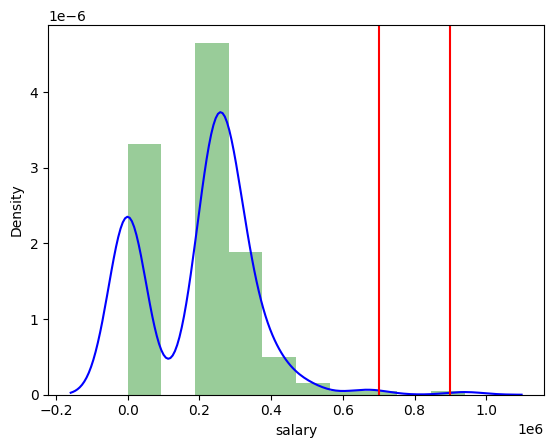

In [51]:
get_pdf_probability(dataset["salary"],700000,900000)

In [52]:
from scipy.stats import ttest_rel
dataset= dataset.dropna()
s_deg = dataset[dataset["degree_t"]=="Sci&Tech"]["etest_p"]
s_deg1 = dataset[dataset["degree_t"]=="Sci&Tech"]["mba_p"]
#print Male
ttest_rel(s_deg,s_deg1)

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.517920600505392e-06), df=np.int64(58))

In [53]:
dataset_cor = dataset.select_dtypes(include=['number']).corr()

In [54]:
dataset_cor

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [55]:
import seaborn as sb

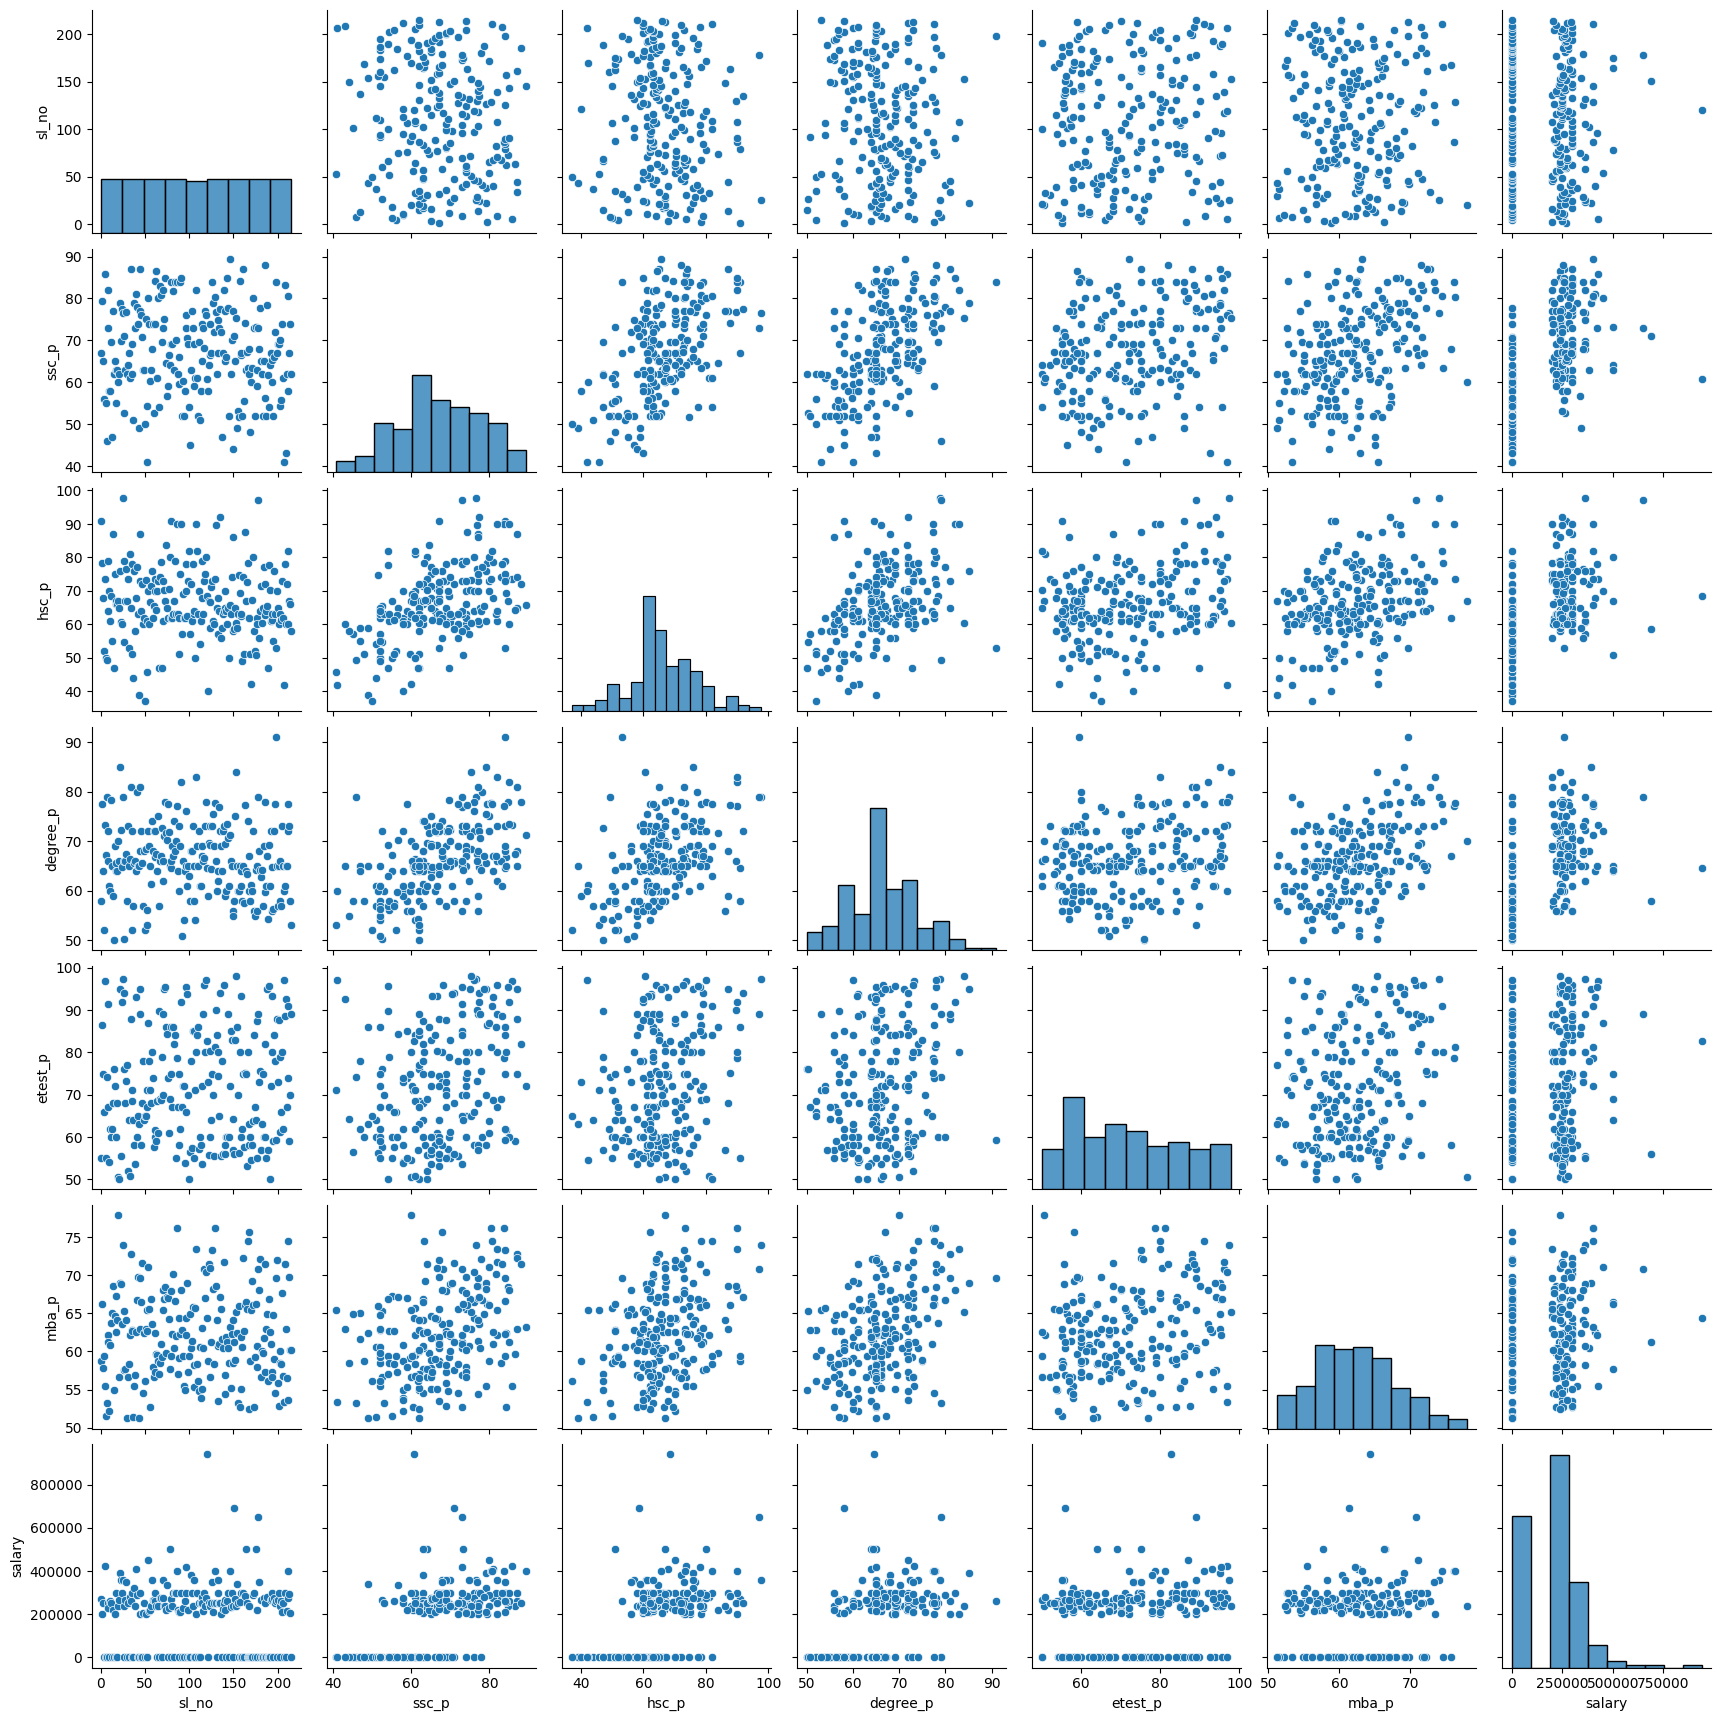

In [56]:
sb.pairplot(dataset)